# Welcome

This page is a <b>Jupyter notebook</b>: a single document that can contain cells of executable code, equations, visualizations, and narrative text. It's like having a single document that handles word processing (such as  Word), math functions (such as Excel), image generation and display, and an interface for coding.

The name <b>Jupyter</b> refers to the three coding languages, <b>Julia, Python, and R</b>, that are pillars of the modern scientific world. 



For this workshop, we are using <b>Google Colaboratory</b> which is a Jupyter notebook environment that requires no setup to use.

### *** JupyterLab users skip to >> JupyterLab users: Getting started ***

## Colaboratory users: Getting started


1. When you opened this notebook in Colaboratory, Google made a clone of the file and placed it into your Google Drive. To preserve a clean copy of the notebook, select <b>File > Save a Copy in Drive</b>. Google adds "Copy of" to the filename. You'll work in the newly named notebook. You can rename the copy by <b>File > Rename</b>. 

2. It's also a best practice to ensure that the colaboratory notebook is in an "usused" state. <b> Do this</b>: <b>Runtime > Restart Runtime</b>. 

3. Usually, the very first cell of a notebook is a code cell that imports necessary coding libraries and tools. In this notebook, you're reading a text cell that is right above the first code cell. You'll need to run the code cell below to load essential information into your notebook. 

#### TO RUN ANY CELL in COLABORATORY
1. There are grey sections, called code cells, on this page that can be executed (played).
2. Hover over the [ ] symbol, notice that it turns into a play symbol
3. Click the "play" button (arrow pointing right) on the code cell to run.
     While you run or "execute" a cell, an asterisk appears inside the bracket to the left of the cell. Once the code has run, the asterisk will be replaced by a number in the brackets.


* Colaboratory users <b>Do this:</b> Run the cell below (this allows the remaining cells to run successfully in colaboratory).

In [ ]:
#pulls into your Google Colaboratory area all of the files needed for this notebook.
!git clone https://github.com/Shelley-E-Olds/ExploreAtlanticStorms.git

#sets up this notebook to run in colaboratory 
!apt-get install libgeos-3.5.0  #getting an error Unable to locate package libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6

#changes the directory to ExploreAtlanticStorms and list all the files
%cd ExploreAtlanticStorms 
!ls

## JupyterLab users: Getting started
1. To preserve a clean copy of the notebook, select <b>File > Save Notebook As...</b> and give it a new name. You'll work in the newly named notebook.

2. It's also a best practice to ensure that the colaboratory notebook is in an "usused" state. <b> Do this</b>: <b>Kernel > Restart Kernel and Clear All Outputs</b>.

3. Usually, the very first cell of a notebook is a code cell that imports necessary coding libraries and tools. In this notebook, you're reading a text cell that is right above the first code cell. You'll need to run the code cell below to load essential information into your notebook. 

#### TO RUN ANY CELL in JupyterLab
1. Click the cell to highlight it (you'll see a vertical blue bar next to it)
2. Click the "play" button (arrow pointing right) at the top of the page. Alternatively, you can press shift+enter. While you run or "execute" a cell, an asterisk appears inside the bracket to the left of the cell. Once the code has run, the asterisk will be replaced by a number in the brackets.

## Everyone, do this:
* Run the cell below (you'll learn more about what it does later).

In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import datetime
from mpl_toolkits.basemap import Basemap

KeyError: 'PROJ_LIB'

![Image of Hurricane Irma. (source: NASA.gov(](./Irma_NASA.jpg)

## Tropical Cyclones and Hurricanes in the Atlantic 

This Jupyter Notebook gives you a way to map the tracks of tropical cyclones and hurricanes recorded in the Atlantic Ocean from 1950 to 2017. 

Start by taking a brief look at the text-based version of the dataset

<b>Click on the link</b>: [dataset.](https://raw.githubusercontent.com/Shelley-E-Olds/ExploreAtlanticStorms/master/Data.txt) (opens in a new tab). 

To get a sense of what the dataset shows, scroll down to check out the set of entries for a single storm. Columns show the Year, Month, Date, Storm number of the year, Storm Name, Latitude, Longitude, Wind speed, and Air pressure. 

Check yourself: In plain-language, describe what this dataset shows. 

## Coding 

To make a map of the storm tracks, the first thing you'll need is a basemap to plot them on. The following code cell instructs python to draw a figure with specific properties. 

1. Take a look at the code. The first line starts with a hashtag. This is a comment line that doesn't affect the code.

2. Focus in on some of the easy-to-read phrases. Many python commands are clear English words that make it very clear what the code will do. Make a prediction to yourself about what you expect to see.

<b>Do this: </b>Run the cell (as instructed above) to see the output.

NameError: name 'Basemap' is not defined

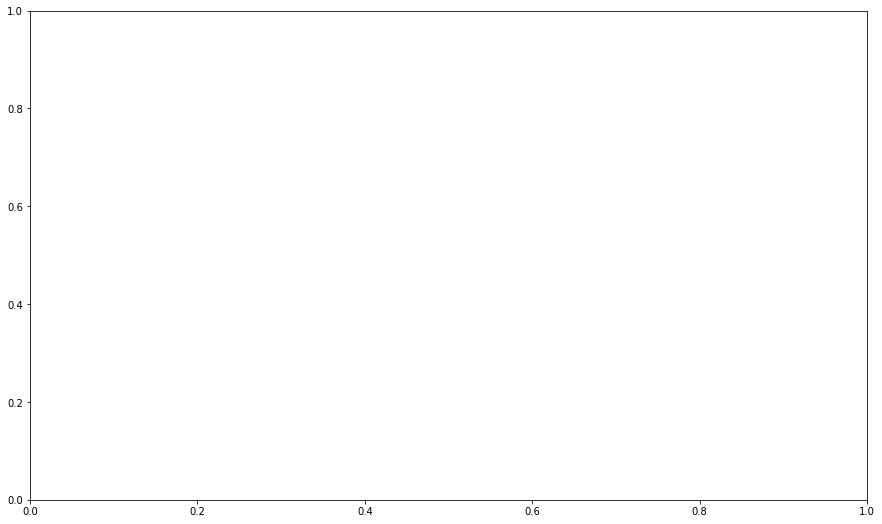

In [4]:
# Draw a basemap
fig = plt.figure(figsize=(15,9))
axes = fig.add_subplot(1, 1, 1)
mapping = Basemap(llcrnrlon=-100.0, llcrnrlat=20.0, urcrnrlon=-20.0, urcrnrlat=57.0,
                  projection='lcc', lat_1=20.0, lat_2=40.0, lon_0=-60.0,
                  resolution ='l', area_thresh=1000.0)

mapping.drawcountries()
mapping.fillcontinents()
mapping.drawcoastlines()
mapping.drawparallels(numpy.arange(10,70,20), labels=[1,1,0,0])
mapping.drawmeridians(numpy.arange(-100,0,20), labels=[0,0,0,1])
axes.set_title('Atlantic Hurricane Tracks (1950-2017)')
plt.show()

Go back up to the code cell and change some of the values, then run it again to see how it changes the basemap. 

For example:
* What do you think will happen if you delete the line mapping.drawcoastlines()? 
* What differences do you notice if you change the numbers for (figsize=)?
* The section of code that begins with "Mapping = Basemap" sets the parameters for the basemap so it is centered on the North Atlantic Ocean and East and Gulf Coasts of the United States. Based on the parameters in the code and the map it produces, can you produce a basemap centered on another portion of the planet? (Hints: ll = lower left; ur = upper right; crnr = corner; lon = longitude; lat = latitude)

Don't worry if you end up with a map you don't like here. The purpose of this section is just to help you understand how the code controls the output.

## Loading Data 

Now, to plot storm tracks on the basemap, you'll need run the next code cell. This will load the text-based data you viewed earlier into your processor's live memory. The code cell instructs your processor to grab the requested data and put it into a specified format for plotting. 

Look over the sets of instructions below to get a sense of how the code will structure the data, then run the cell. In this case, the only visual sign of running the code will be the temporary appearance of an asterisk within the brackets, which will be replaced by a number when it's done. 

In [9]:
# Load data
hurricanes = {}
current_name = None
num_hurricanes = numpy.zeros(68, dtype=int)
cache = [[], [], [], [], [], [], [], [], []]

with open("Data_AtlanticStorms_1950_2017.txt", 'r') as hurdat_data:
    for line in hurdat_data:
        split_data = line.split()
        year = int(split_data[0])
        month = int(split_data[1])
        day = int(split_data[2])
        hour = int(split_data[3])
        if split_data[5] == "NOT" and split_data[6] == "NAMED":
            pass
        else:
            name = split_data[5]
            lat = float(split_data[6])
            lon = float(split_data[7])
            wind_speed = float(split_data[8])
            pressure = float(split_data[9])
        
            # Categorize hurricanes (wind speed in knots)
            if wind_speed >= 64 and wind_speed < 83:
                category = 1
            elif wind_speed >= 83 and wind_speed < 96:
                category = 2
            elif wind_speed >= 96 and wind_speed < 113:
                category = 3
            elif wind_speed >= 113 and wind_speed < 135:
                category = 4
            elif wind_speed >= 135:
                category = 5
            else:
                category = 0
        
            if name != current_name:
                hurricanes[current_name] = {'year':cache[0][:], 
                                            'month':cache[1][:], 
                                            'day':cache[2][:], 
                                            'hour':cache[3][:], 
                                            'latitude':cache[4][:], 
                                            'longitude':cache[5][:], 
                                            'wind speed':cache[6][:], 
                                            'pressure':cache[7][:], 
                                            'category':cache[8][:]}
                cache = [[], [], [], [], [], [], [], [], []]
                current_name = name

                # Count huricanes
                num_hurricanes[year - 1950] +=  1

            cache[0].append(year)
            cache[1].append(month)
            cache[2].append(day)
            cache[3].append(hour)
            cache[4].append(lat)
            cache[5].append(lon)
            cache[6].append(wind_speed)
            cache[7].append(pressure)
            cache[8].append(category)
            
# Remove empty hurricanes
for name in hurricanes.keys():
    if len(hurricanes[name]['year']) == 0:
        data = hurricanes[name]
        
print ("Data is loaded!")



Data is loaded!






## Plotting the data on the map

With the data properly formatted and loaded in memory, the next code cell will draw the basemap (as above); the new section of code will use the latitude/longitude information from each storm report to plot lines of a specified width and color.




In [ ]:
# Plot the data
fig = plt.figure(figsize=(15,9))
axes = fig.add_subplot(1, 1, 1)
mapping = Basemap(llcrnrlon=-100.0, llcrnrlat=0.0, urcrnrlon=-20.0, urcrnrlat=57.0,
                  projection='lcc', lat_1=20.0, lat_2=40.0, lon_0=-60.0,
                  resolution ='l', area_thresh=1000.0)

for (name, data) in hurricanes.items():
    longitude, latitude = mapping(data['longitude'], data['latitude'])
    mapping.plot(longitude, latitude, linewidth=1.5, color='r')

mapping.drawcoastlines()
mapping.drawcountries()
mapping.fillcontinents()
mapping.drawparallels(numpy.arange(10,70,20), labels=[1,1,0,0])
mapping.drawmeridians(numpy.arange(-100,0,20), labels=[0,0,0,1])
axes.set_title('Atlantic Hurricane Tracks (1950-2017)')
plt.show()


### Whoa! Is that what you expected? 
Keep in mind that the output (the map you see on the screen) is the direct result of your input (the code you ran). 

Changing the color of lines to show the intensity of each storm could help you identify the strongest storms. The next code cell does just that. Check out the new lines of code and then run the cell. 

NOTE: Be patient if it takes some time to produce a map. An asterisk in the brackets before a cell means that the information is being processed.

In [ ]:
# Plot the data with different colors for different categories
category_color = {5:'red', 4:'yellow', 3:'orange', 2:'green', 1:'blue', 0:'gray'}
fig = plt.figure(figsize=(15,9))
axes = fig.add_subplot(1, 1, 1)
mapping = Basemap(llcrnrlon=-100.0, llcrnrlat=0.0, urcrnrlon=-20.0, urcrnrlat=57.0,
                  projection='lcc', lat_1=20.0, lat_2=40.0, lon_0=-60.0,
                  resolution ='l', area_thresh=1000.0)

for (name, data) in hurricanes.items():
    longitude, latitude = mapping(data['longitude'], data['latitude'])
    for i in range(len(longitude) - 1):
        color = category_color[data['category'][i]]
        mapping.plot(longitude[i:i+2], latitude[i:i+2], linewidth=1.5, color=color)

mapping.drawcoastlines()
mapping.drawcountries()
mapping.fillcontinents()
mapping.drawparallels(numpy.arange(10,70,20), labels=[1,1,0,0])
mapping.drawmeridians(numpy.arange(-100,0,20), labels=[0,0,0,1])
axes.set_title('Atlantic Hurricane Tracks (1950-2017)')
for (category, color) in category_color.items():
    axes.plot([0], [0], color=color, label="Category %s" % category)
axes.legend(loc=2)
plt.show()

### That's an improvement, but it's still hard to learn much from the map...  

The good news is that you can use code to produce maps to answer specific questions about the storms. Check the following code cell. What question(s) do you think the output map will answer? Run the cell to check yourself.
 

In [ ]:
# Plot the data
category_color = {5:'red', 4:'yellow', 3:'orange', 2:'green', 1:'blue', 0:'gray'}
fig = plt.figure(figsize=(15,9))
axes = fig.add_subplot(1, 1, 1)
mapping = Basemap(llcrnrlon=-100.0, llcrnrlat=0.0, urcrnrlon=-20.0, urcrnrlat=57.0,
                  projection='lcc', lat_1=20.0, lat_2=40.0, lon_0=-60.0,
                  resolution ='l', area_thresh=1000.0)

for (name, data) in hurricanes.items():
    try:
        
        if data['year'][0] == 2005 and numpy.any(numpy.array(data['category']) >= 3):
            if name == "KATRINA":
                longitude, latitude = mapping(data['longitude'], data['latitude'])
                
                for i in range(len(longitude) - 1):
                    color = category_color[data['category'][i]]
                    mapping.plot(longitude[i:i+2], latitude[i:i+2], linewidth=1.5, color=color)         
    
    except Exception as e:
        print() # todo: the exception should be handled some other way
        
mapping.drawcoastlines()
mapping.drawcountries()
mapping.fillcontinents()
mapping.drawparallels(numpy.arange(10,70,20), labels=[1,1,0,0])
mapping.drawmeridians(numpy.arange(-100,0,20), labels=[0,0,0,1])
axes.set_title('Atlantic Hurricane Tracks (1950-2017)')
for (category, color) in category_color.items():
    axes.plot([0], [0], color=color, label="Category %s" % category)
axes.legend(loc=2)
plt.show()

In [ ]:
# Plot the data for hurricanes that hit category 5
category_color = {5:'red', 4:'yellow', 3:'orange', 2:'green', 1:'blue', 0:'gray'}
fig = plt.figure(figsize=(15,9))
axes = fig.add_subplot(1, 1, 1)
mapping = Basemap(llcrnrlon=-100.0, llcrnrlat=0.0, urcrnrlon=-20.0, urcrnrlat=57.0,
                  projection='lcc', lat_1=20.0, lat_2=40.0, lon_0=-60.0,
                  resolution ='l', area_thresh=1000.0)

for (name, data) in hurricanes.items():
    try:
        
        if numpy.any(numpy.array(data['category']) >= 5):
                longitude, latitude = mapping(data['longitude'], data['latitude'])
                
                for i in range(len(longitude) - 1):
                    color = category_color[data['category'][i]]
                    mapping.plot(longitude[i:i+2], latitude[i:i+2], linewidth=1.5, color=color)         
    
    except Exception as e:
        print() # todo: the exception should be handled some other way
        
mapping.drawcoastlines()
mapping.drawcountries()
mapping.fillcontinents()
mapping.drawparallels(numpy.arange(10,70,20), labels=[1,1,0,0])
mapping.drawmeridians(numpy.arange(-100,0,20), labels=[0,0,0,1])
axes.set_title('Atlantic Hurricane Tracks (1950-2017)')
for (category, color) in category_color.items():
    axes.plot([0], [0], color=color, label="Category %s" % category)
axes.legend(loc=2)
plt.show()

## Challenge: Modify and run code to answer one or more of these questions: 

1. Start by selecting and copying the code cell above.
2. Click the + icon to insert a new cell and paste in the code.
3. Insert a new line at the top of the code that starts with a hashtag, then enter a comment about what you attempting to do.
4. Modify the code and then run it to answer one of the following questions. 

#### * What path did Hurricane Camille follow in 1969?
#### * Can you produce a map showing any tropical storms that had the same name as you or a friend of yours? 
#### * Where are the paths of the strongest hurricanes (category = 5)?
#### * Where did the Atlantic storms of 2017 travel?
#### * Produce a map of all tropical storms that occurred during June of a specific year. Produce a series of maps showing tropical storms for each month of a year. 

What other questions can you answer using this code?

Note: If you want to add a text section above any code cell, click the + icon, select Markdown from the drop-down menu, and begin typing your text. Use another browser tab to search for "markdown cheatsheet" to find  symbols to control your text output. Edit any markdown cell by double-clicking it, then run the cell to see the output.

## Challenge #2:

Knowing the structure of the data loaded into your processor and a few more python commands can help you query the data to answer additional questions. For example, the following code uses graph-generating commands to produce a graph showing numbers of hurricanes for each year. 

If you like, you can try modifying this code to produce a graph of new information.  

In [ ]:
# Graph number of hurricanes per year 
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(range(1950, 2018, 1), num_hurricanes, 'o-')
axes.plot((1950, 2017), (num_hurricanes.mean(), num_hurricanes.mean()), 'r')

# Compute rolling average
num_hurricanes_mean = numpy.zeros(14)
for i in range(0,67,5):
    num_hurricanes_mean[(int)(i/5)] = num_hurricanes[i:i+5].mean()
    

axes.plot(range(1950, 2018, 5), num_hurricanes_mean, 'ko--')
axes.set_xlim((1950, 2017))
axes.set_title("Hurricanes Each Year")
axes.set_xlabel("Year")
axes.set_ylabel("Number")
plt.show()

## How can I lift the hood to see how this works?

For information about the initial imports in this notebook, please see the notebook [here](./explanation_of_initial_python_imports.ipynb).

## Consider what you could learn from other BIG datasets. 

What kinds of questions might you be able to answer using python code to explore one or more datasets from the [**C**ollection of **R**eally **G**reat, **I**nteresting, **S**ituated **D**atasets](https://think.cs.vt.edu/corgis/python/index.html) (opens in a new tab).

## Recap 

* What did you learn about hurricanes today?
* What did you learn about coding?
* What are some issues that came up? 
* What would it take to expand this activity to explore other types of data?
